# Datathon Spring 2020
### Joon-young Gwak, Donghun Lee


# Online Shopper's Intention Data

**Brief Data Description**
  - Source: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset
  - Dimension: (12330, 18)
  - Data is collected by a real-time online shopper behavior analysis system invented by C.Okan Sakar et al. 

### Dataset & Library Importation

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, special
import sklearn
from sklearn import preprocessing, ensemble, model_selection


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_columns', None)


raw_data= pd.read_csv('./online_shoppers_intention.csv')

### Description of Columns

**Descriptive Statistics**

In [322]:
raw_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Target Variable ( Boolean ) 
**Revenue**: T/F of Purchase

### Numerical data
**Administrative:** Number of pages visited by the visitor about account management 

**Administrative_Duration**: Total amount of time (in seconds) spent by the visitor on account management related pages (by second)

**Informational**: Number of pages visited by the visitor about Web site, communication and address information of the shopping site

**Informational_Duration**: Total amount of time (in seconds) spent by the visitor on informational pages (by second)

**ProductRelated**: Number of pages visited by visitor about product related pages

**ProductRelated_Duration**: Total amount of time (in seconds) spent by the visitor on product related pages (by second)

**BounceRates**: Average bounce rate value of the pages visited by the visitor

**ExitRates**: Average exit rate value of the pages visited by the visitor

**PageValues**: Average page value of the pages visited by the visitor

**SpecialDay**: Closeness of the site visiting time to a special day

### Categorical data ( Cardinal ) 
**Month**: Month value of the visit date

**OperatingSystems**: Operating system of the visitor	

**Browser**: Browser of the visitor

**Region**: Geographic region from which the session has been started by the visitor

**TrafficType**: Traffic source by which the visitor has arrived at the Web site 
                   (e.g., banner, SMS, direct)
                   
**VisitorType**: Visitor type as “New Visitor,” “Returning Visitor,” and “Other”

**Weekend**: Boolean value indicating whether the date of the visit is weekend	

## Preprocessing 

In [334]:
Numerical_Colnames = ["Administrative", "Administrative_Duration", "Informational",
                      "Informational_Duration", "ProductRelated", "ProductRelated_Duration",
                       "BounceRates", "ExitRates", "PageValues", "SpecialDay"]

CardinalCat_Colnames = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType",
                         "VisitorType"]

Bool_Columns = ['Weekend', 'Revenue']

Target_Column = ['Revenue']

In [324]:
raw_data.head(10 )

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


## Numerical Columns Preprocessing

**1. YeoJohnson Transformation (Similar to Box-Cox Transformation)**
   - While Box-Cox only accepts strictly positive data values, many columns in our dataset are sparse. Thus, we implement the yeojohnson transformation which does not have a strictily positive constraint.  

**2. MinMax-Scaling**

**Skewness of our numerical columns**

   - Typically, when skewness is < -1 or > 1 , the distribution is consdiered "highly skewed."
   - Even considering this is a sparse data, the our data's skewness is significant. Thus, we can apply power-transformation to decrease the skewness of our numerical columns

In [325]:
raw_data[Numerical_Colnames].skew() 

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
dtype: float64

**As can be shown below, our numerical columns are sparse, except of the "ExitRates" column.**

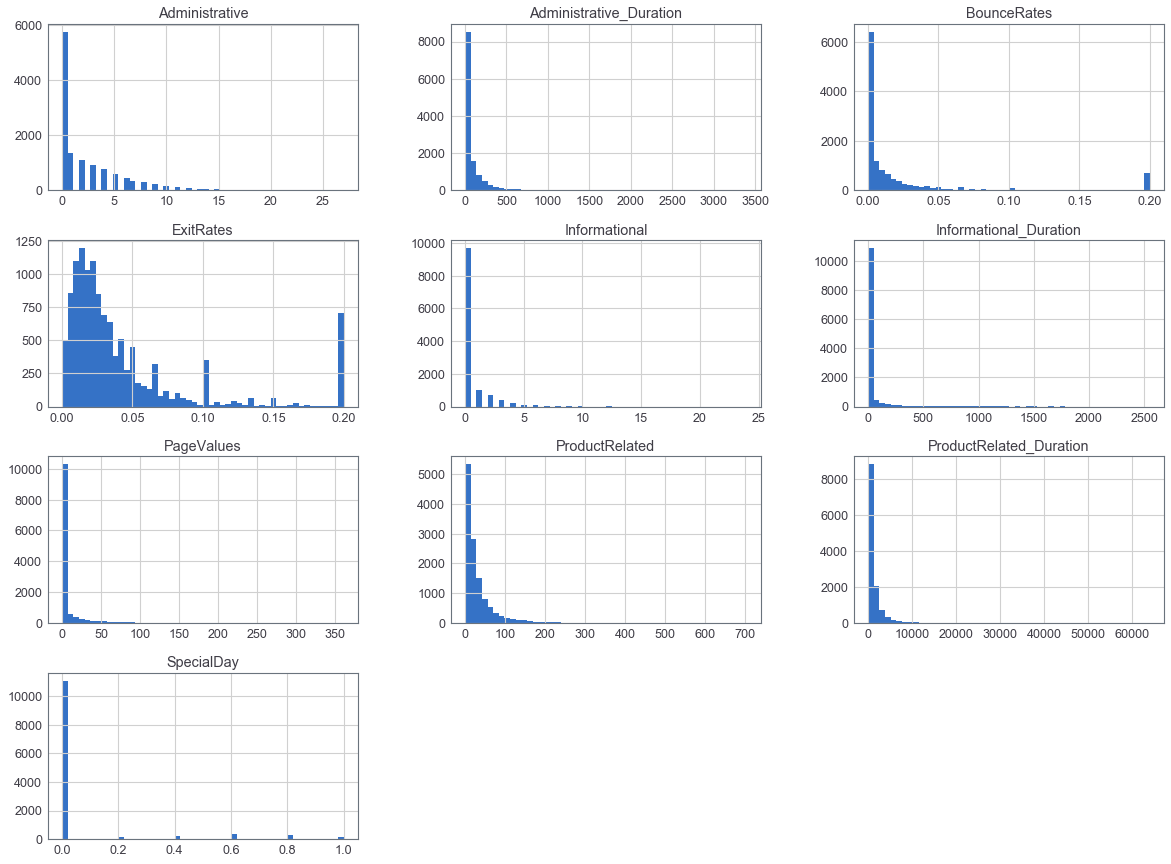

In [326]:
raw_data[Numerical_Colnames].hist(bins=50, figsize=(20,15)) ;

### YeoJohnson Transformation
   - Considering the Yeojohnson only accepts float64bit data types,
      change the integer type columns to float64.

In [327]:
# Administrative, Informational, ProductRelated datatypes : Int -> flaot64

for integerdtype_col in ['Administrative', 'Informational', 'ProductRelated']:    
    raw_data[integerdtype_col] = raw_data[integerdtype_col].astype('float64')


- **Obtaining the yeo-johnson lambdas for numerical columns that maximize the log-likelihood function.**

In [328]:
bestlambda_by_numericcol_dict= {}

for numeric_col in Numerical_Colnames: 

    bestlambda_by_numericcol_dict[numeric_col] =  stats.yeojohnson(raw_data[numeric_col])[1]
    
bestlambda_by_numericcol_dict

{'Administrative': -0.51529445145879,
 'Administrative_Duration': -0.10513666372544453,
 'Informational': -3.8087027035245975,
 'Informational_Duration': -1.1075921681455478,
 'ProductRelated': 0.01884362787915048,
 'ProductRelated_Duration': 0.22894560912654202,
 'BounceRates': -36.75352743933135,
 'ExitRates': -21.684504268919707,
 'PageValues': -1.4498908686297258,
 'SpecialDay': -21.097308222719484}

In [329]:
bestlambda_by_numericcol_dict['BounceRates'] = -5.0 
bestlambda_by_numericcol_dict['ExitRates'] = -5.0 
bestlambda_by_numericcol_dict['SpecialDay'] = -5.0 

bestlambda_by_numericcol_dict

{'Administrative': -0.51529445145879,
 'Administrative_Duration': -0.10513666372544453,
 'Informational': -3.8087027035245975,
 'Informational_Duration': -1.1075921681455478,
 'ProductRelated': 0.01884362787915048,
 'ProductRelated_Duration': 0.22894560912654202,
 'BounceRates': -5.0,
 'ExitRates': -5.0,
 'PageValues': -1.4498908686297258,
 'SpecialDay': -5.0}

### Note on YeoJohnson Powertransformation Best Lambdas

- **Typically, the acceptable best lambda range is -5 to 5.**
- **Except for "BounceRates", "ExitRates", and "SpecialDay" columns, each column's log-likelihood maximizing lambdas fall in to the above range.**
- **Considering that the obtained lambdas for "BounceRates", "ExitRates", and "SpecialDay" are all negative values exceeding -5, we set their best values as -5, which is the minimum of the acceptable range.** 

In [330]:
pt_data = raw_data.copy()

for colname in bestlambda_by_numericcol_dict:

    pt_data[colname] =  stats.yeojohnson(x = raw_data[colname],
                                              lmbda = bestlambda_by_numericcol_dict[colname])
pt_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.00000,-0.0,-0.0,-0.0,0.697694,0.000000,0.119624,0.119624,-0.0,-0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,-0.00000,-0.0,-0.0,-0.0,1.110063,6.990788,-0.000000,0.075816,-0.0,-0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,-0.00000,-0.0,-0.0,-0.0,0.697694,0.000000,0.119624,0.119624,-0.0,-0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,-0.00000,-0.0,-0.0,-0.0,1.110063,1.513204,0.043295,0.096126,-0.0,-0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,-0.00000,-0.0,-0.0,-0.0,2.452895,14.727490,0.018854,0.043295,-0.0,-0.000000,Feb,3,3,1,4,Returning_Visitor,True,False
5,-0.00000,-0.0,-0.0,-0.0,3.081901,9.495667,0.015068,0.022850,-0.0,-0.000000,Feb,2,2,1,3,Returning_Visitor,False,False
6,-0.00000,-0.0,-0.0,-0.0,0.697694,0.000000,0.119624,0.119624,-0.0,0.162813,Feb,2,4,3,3,Returning_Visitor,False,False
7,0.58287,-0.0,-0.0,-0.0,0.000000,0.000000,0.119624,0.119624,-0.0,-0.000000,Feb,1,2,1,5,Returning_Visitor,True,False
8,-0.00000,-0.0,-0.0,-0.0,1.110063,5.677203,-0.000000,0.075816,-0.0,0.189416,Feb,2,2,2,3,Returning_Visitor,False,False
9,-0.00000,-0.0,-0.0,-0.0,1.404560,15.448846,-0.000000,0.020814,-0.0,0.162813,Feb,2,4,1,2,Returning_Visitor,False,False


### Resultingly, the skewness of the numerical columns significantly decreased

In [331]:
pt_data[Numerical_Colnames].skew() 

Administrative             0.243728
Administrative_Duration    0.145485
Informational              1.404111
Informational_Duration     1.546903
ProductRelated            -0.002576
ProductRelated_Duration   -0.036336
BounceRates                2.505828
ExitRates                  1.591446
PageValues                 1.377420
SpecialDay                 2.728805
dtype: float64

### Min-Max Scaling

In [332]:
MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
pt_data[Numerical_Colnames] = MinMaxScaler.fit_transform(pt_data[Numerical_Colnames])
pt_data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,0.0,0.0,0.158983,0.137994,0.000000,0.633781,0.0,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,0.0,0.0,0.158983,0.029870,0.361922,0.803567,0.0,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,0.0,0.0,0.351304,0.290713,0.157609,0.361922,0.0,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.000000,0.0,0.0,0.0,0.441391,0.187439,0.125963,0.191018,0.0,0.000000,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.840326,Feb,2,4,3,3,Returning_Visitor,False,False
7,0.366098,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.000000,0.0,0.0,0.0,0.158983,0.112065,0.000000,0.633781,0.0,0.977629,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.000000,0.0,0.0,0.0,0.201161,0.304952,0.000000,0.173997,0.0,0.840326,Feb,2,4,1,2,Returning_Visitor,False,False


## Categorical (Cardinal)  Columns Preprocessing

- **The some of the original categorical columns are label-encoded, and some are not.**
- **Typically, label-encoded columns are for "ordinal variables", which is not our case.**
- **Thus, we proceed with the "OneHot Encoding" of all categorical values we have.**

In [335]:
pt_data[CardinalCat_Colnames].head(10)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,Feb,1,1,1,1,Returning_Visitor
1,Feb,2,2,1,2,Returning_Visitor
2,Feb,4,1,9,3,Returning_Visitor
3,Feb,3,2,2,4,Returning_Visitor
4,Feb,3,3,1,4,Returning_Visitor
5,Feb,2,2,1,3,Returning_Visitor
6,Feb,2,4,3,3,Returning_Visitor
7,Feb,1,2,1,5,Returning_Visitor
8,Feb,2,2,2,3,Returning_Visitor
9,Feb,2,4,1,2,Returning_Visitor


- **The Disadvantage of "OneHot Encoding" is that it if there are so many distinct values by column, the dimensions will exponentiate and lead to the curse of dimensionality.**-
- **So we calculate how many dimensions would be added once we implement the "OneHot Encoder" here.**

In [336]:
DimIncrease_cnt = 0;

for colname in CardinalCat_Colnames:
    
    DimIncrease_cnt += len( set(pt_data[colname]) )
    
print(DimIncrease_cnt)

63


- **It is shown that 57 (63-6) dimensions will be added to our dataset once we implement OneHotEncoding ("OHE").**
- **By implementing OHE, our total dimension will become 75.**

#### Onehot Encoding Implementation

In [354]:
x = enc.fit_transform(pt_data[CardinalCat_Colnames])
colnames = enc.get_feature_names(CardinalCat_Colnames)
onehot_dt = pd.DataFrame( x.toarray(), columns = colnames )

onehot_dt.head(10)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [344]:
pt_oh_dt = pt_data.copy()
pt_oh_dt.drop( columns= CardinalCat_Colnames, inplace= True  )
pt_oh_dt = pt_oh_dt.join(onehot_dt)
pt_oh_dt.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.0,0.158983,0.137994,0.000000,0.633781,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.0,0.0,0.158983,0.029870,0.361922,0.803567,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.351304,0.290713,0.157609,0.361922,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.000000,0.0,0.0,0.0,0.441391,0.187439,0.125963,0.191018,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.840326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.366098,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.000000,0.0,0.0,0.0,0.158983,0.112065,0.000000,0.633781,0.0,0.977629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.000000,0.0,0.0,0.0,0.201161,0.304952,0.000000,0.173997,0.0,0.840326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Boolean Columns Preprocessing
- **Conversion to the corresponding numeric values**

In [351]:
pt_oh_dt.Weekend = [0 if bool_val == False else 1 for bool_val in pt_oh_dt.Weekend ]
pt_oh_dt.Revenue = [0 if bool_val == False else 1 for bool_val in pt_oh_dt.Revenue ]

In [362]:
pt_oh_dt.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.0,0.0,0.158983,0.137994,0.000000,0.633781,0.0,0.000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.0,0.0,0.0,0.158983,0.029870,0.361922,0.803567,0.0,0.000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.351304,0.290713,0.157609,0.361922,0.0,0.000000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.000000,0.0,0.0,0.0,0.441391,0.187439,0.125963,0.191018,0.0,0.000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.000000,0.0,0.0,0.0,0.099924,0.000000,1.000000,1.000000,0.0,0.840326,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.366098,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.000000,0.0,0.0,0.0,0.158983,0.112065,0.000000,0.633781,0.0,0.977629,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.000000,0.0,0.0,0.0,0.201161,0.304952,

In [392]:
pt_oh_dt.shape

(12330, 75)

- **We finalize our data preprocessing here, since we judge that there is no urgent call for dimensionality reduction given the final dimension of (12330, 75).**

## Implementation of Machine Learning Algorithms


- **Approach**

   - **Basic Environment**
    - Evaluation Metric: 1. AUC 2. Accuracy Rate 
    - Random Forest Classifier 

## Random Forest Classifier 

- Hyper-paremeters for Classifciation Trees are:
    
    - max_depth: default = None.
    - min_samples_split: default = 2.
    - min_samples_leaf: default = 1.
    - n_estimators: The number of trees. default=100.
    - bootstrap: Whether bootstrap samples are used when building trees. default=true.
    - oob_score: Whether to use out-of-bag samples to estimate the generalization error. default=false.
    
- **We implement Hyper-parameter tuning using gridsearch for the optimal parameter values that deliver the best evaluation metric value.**

In [442]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

n_estimators = [100, 300, 500]
max_depth = [10, 50, 100] ; 
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2 ,4]

grid_dict = { 'n_estimators' : n_estimators, 
              'max_depth' : max_depth, 
              'min_samples_split' : min_samples_split, 
              'min_samples_leaf' : min_samples_leaf,
            }


GridSearchCV_obj= model_selection.GridSearchCV(randomForest, grid_dict, 
                                               scoring= 'roc_auc', cv = 5, n_jobs = -1 )

In [443]:
train_dt = pt_oh_dt.loc[:, pt_oh_dt.columns != 'Revenue']
test_dt =  pt_oh_dt[Target_Column]

In [444]:
GridSearchCV_obj.fit( train_dt , test_dt )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

### GridSearch Results

In [446]:
GridSearchCV_obj.best_params_
GridSearchCV_obj.best_score_ # ROC AUC 

{'max_depth': 50,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 500}

0.9134074909744241

In [450]:
randomForest.set_params( n_estimators = 500, max_depth = 50, min_samples_split = 5, 
                         min_samples_leaf = 4 )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [555]:
scores = [];
kfolds = model_selection.KFold( n_splits= 5 , shuffle= False )

for i in range(5):
    folds_iter = next(kfolds.split(train_dt), None)
    x_train = train_dt.iloc[folds_iter[0]]
    x_test =  train_dt.iloc[folds_iter[1]]
    y_train = test_dt.iloc[folds_iter[0]]
    y_test = test_dt.iloc[folds_iter[1]]
    mod = randomForest.fit(x_train, y_train)
    scores.append( mod.score( x_test, y_test ) )
    
scores # Accuracy

[0.9444444444444444,
 0.9428223844282239,
 0.9428223844282239,
 0.943227899432279,
 0.9440389294403893]

### Feature Importance Plot

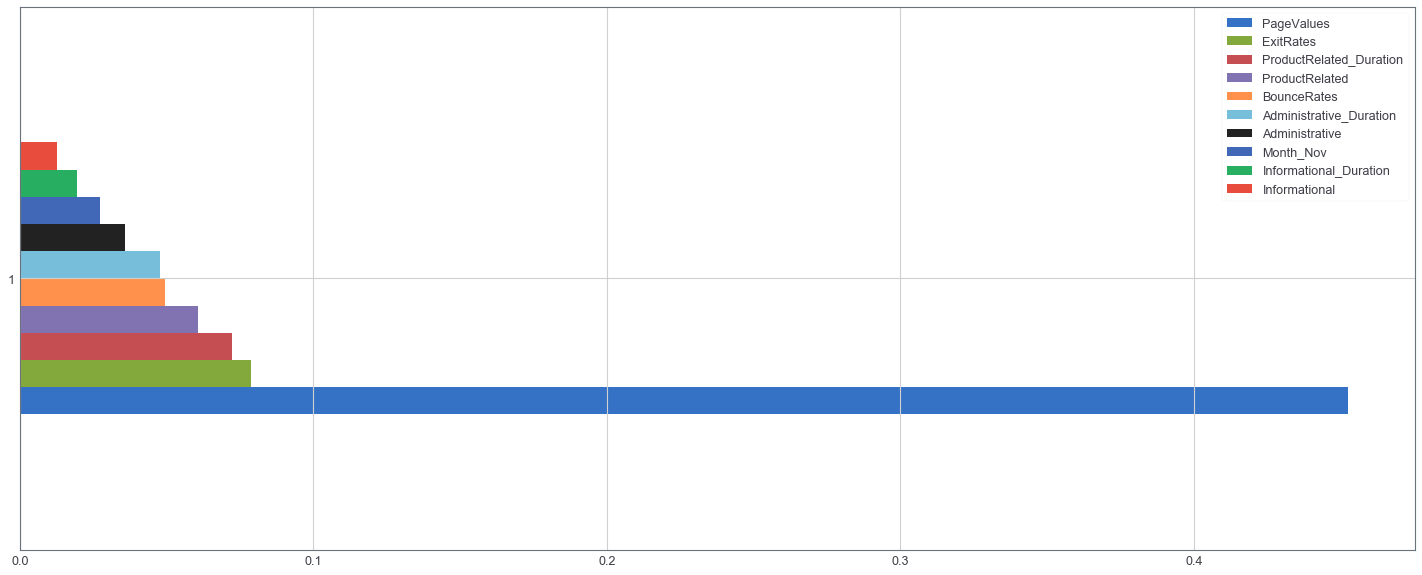

In [541]:
def feat_impplotter():
    
    feat_imp= list( zip(train_dt.columns, randomForest.feature_importances_ ) )
    sorted_feat_imp = sorted(feat_imp, key = lambda x: x[1], reverse= True)
    featimp_df = pd.DataFrame.from_records(sorted_feat_imp, [i[0] for i in sorted_feat_imp] )
    featimp_df = featimp_df.T
    featimp_df.drop(featimp_df.index[0], inplace = True)
    top10_featimp = featimp_df.iloc[:, 0:10 ]
    
    return top10_featimp.plot.barh(figsize = (10, 6), sort_columns = True )

feat_impplotter()